# 0.0 IMPORTS

## NOTES

**import warnings**: used to omit the warnings in the code

warnings.filterwarnings('ignore')

**import ipywidgets as widgets**: Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc (ipython.org)

**import seaborn as sns**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. (pydata.org)

**import plotly.express as px**: The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. (plotly.com)

**import pandas as pd**: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool (pydata.org)

**import numpy as np**: It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more. (numpy.org)

**from matplotlib import pyplot as plt**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python (matplotlib.org)

**from ipywidgets import fixed, interact, interactive, fixed, interact_manual**

**from geopy.geocoders import Nominatim**: geopy is a Python client for several popular geocoding web services (pypi.org). Nominatim uses OpenStreetMap data to find locations on Earth by name and address (geocoding). It can also do the reverse, find an address for any location on the planet (nominatim.org).  Each geolocation service you might use, such as Google Maps, Bing Maps, or Nominatim, has its own class in geopy.geocoders abstracting the service’s API. Geocoders each define at least a geocode method, for resolving a location from a string, and may define a reverse method, which resolves a pair of coordinates to an address. Each Geocoder accepts any credentials or settings needed to interact with its service, e.g., an API key or locale, during its initialization.

**from tabulate import tabulate**: Pretty-print tabular data in Python, a library and a command-line utility (pypi.org)

**from matplotlib import gridspec**: A grid layout to place subplots within a figure (matplotlib.org)

**from IPython.display import Image**: Public API for display tools in IPython (pypi.org)

## Imports

In [8]:
import warnings

warnings.filterwarnings('ignore')

import ipywidgets     as widgets
import seaborn        as sns
import plotly.express as px

import pandas         as pd
import numpy          as np

from matplotlib       import pyplot    as plt

from ipywidgets       import fixed,interact, interactive, fixed, interact_manual
from geopy.geocoders  import Nominatim
from tabulate         import tabulate
from matplotlib       import gridspec
from IPython.display  import Image 
from pathlib          import Path

## 0.1 Helper Function

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 DATA DESCRIPTION

In [10]:
df1 = pd.read_csv(Path("/home/work/Documents/repos/python_zero_ao_ds_github/data/kc_house_data.csv"))

In [11]:
df1.loc[df1.duplicated(subset='id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.00,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
314,4139480200,20141209T000000,1400000.00,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
325,7520000520,20150311T000000,240500.00,2,1.00,1240,12092,1.00,0,0,...,6,960,280,1922,1984,98146,47.50,-122.35,1820,7460
346,3969300030,20141229T000000,239900.00,4,1.00,1000,7134,1.00,0,0,...,6,1000,0,1943,0,98178,47.49,-122.24,1020,7138
372,2231500030,20150324T000000,530000.00,4,2.25,2180,10754,1.00,0,0,...,7,1100,1080,1954,0,98133,47.77,-122.34,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.00,4,3.50,2910,5260,2.00,0,0,...,9,2910,0,2012,0,98065,47.52,-121.88,2910,5260
20613,2724049222,20141201T000000,220000.00,2,2.50,1000,1092,2.00,0,0,...,7,990,10,2004,0,98118,47.54,-122.27,1330,1466
20670,8564860270,20150330T000000,502000.00,4,2.50,2680,5539,2.00,0,0,...,8,2680,0,2013,0,98045,47.48,-121.73,2680,5992
20780,6300000226,20150504T000000,380000.00,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598


In [12]:
df1 = df1.drop_duplicates(subset='id')

## 1.1 Data Dimension

In [13]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 21436
Number of columns: 21


In [14]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.2 Data Types

In [15]:
print(df1.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## 1.3 Check NA

In [16]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Change Types

In [17]:
df1['date'] = pd.to_datetime(df1['date'])

In [18]:
df1['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [19]:
df1['yr_built'] = pd.to_datetime(df1['yr_built'], format='%Y')

In [20]:
df1['yr_built'].unique()

array(['1955-01-01T00:00:00.000000000', '1951-01-01T00:00:00.000000000',
       '1933-01-01T00:00:00.000000000', '1965-01-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1963-01-01T00:00:00.000000000',
       '1960-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '1942-01-01T00:00:00.000000000', '1927-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1900-01-01T00:00:00.000000000',
       '1979-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1916-01-01T00:00:00.000000000', '1921-01-01T00:00:00.000000000',
       '1969-01-01T00:00:00.000000000', '1947-01-01T00:00:00.000000000',
       '1968-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1941-01-01T00:00:00.000000000', '1915-01-01T00:00:00.000000000',
       '1909-01-01T00:00:00.000000000', '1948-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '1929-01-01

In [21]:
df1['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [22]:
df1['yr_renovated'] = df1['yr_renovated'].apply(lambda x: pd.to_datetime('1900', format='%Y') 
                          if x==0 
                          else pd.to_datetime(x, format='%Y'))

In [23]:
df1['yr_renovated'].unique()

array(['1900-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '1992-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1978-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '1954-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1945-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '1957-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1981-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1970-01-01

## 1.5 Descriptive Statistics

In [24]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

### 1.5.1 Numerical Attributes

In [25]:
# Central Tendency - mean, median
mean_   = pd.DataFrame(num_attributes.apply(np.mean,   axis=0)).T
median_ = pd.DataFrame(num_attributes.apply(np.median, axis=0)).T

# Dispersion - std, min, max, range, skew, kurtosis
rang  = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
skew  = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurto = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
std   = pd.DataFrame(num_attributes.apply(np.std, axis=0)).T
min_  = pd.DataFrame(num_attributes.apply(np.min, axis=0)).T
max_  = pd.DataFrame(num_attributes.apply(np.max, axis=0)).T

df_num_att = pd.concat([min_, max_, rang, mean_, median_, std, skew, kurto]).T.reset_index()
df_num_att.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df_num_att

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580765328.18,3904921185.00,2876522535.73,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540529.29,450000.00,367680.72,4.03,34.62
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,49.64
3,bathrooms,0.00,8.00,8.00,2.12,2.25,0.77,0.51,1.29
4,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,5.25
5,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,284.08
6,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,-0.49
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.34,126.55
8,view,0.00,4.00,4.00,0.24,0.00,0.77,3.39,10.83
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,0.52


# 2.0 FEATURE ENGINEERING

In [26]:
df2 = df1.copy()

## 2.1 Mental Map Hypothesis

In [27]:
Image(Path("/home/work/Documents/repos/python_zero_ao_ds/reports/figures/mindmaphyphotesis.png"))

FileNotFoundError: No such file or directory: '/home/work/Documents/repos/python_zero_ao_ds/reports/figures/mindmaphyphotesis.png'

FileNotFoundError: No such file or directory: '/home/work/Documents/repos/python_zero_ao_ds/reports/figures/mindmaphyphotesis.png'

<IPython.core.display.Image object>

## 2.2 Hyphotesis Criation

**H1:** Houses that have waterview, are 3 times more expansive, in average, than houses without waterview.

**H2:** Houses with built year below 1955, are 50% cheaper, in average.

**H3:** Houses with basement have sqf t lot that are 50% larger than the houses without basement.

**H4:** The price evolution of houses YoY ( Year over Year ) is 10%.

**H5:** Houses with 3 bathrooms has an growth MoM ( Month over Month ) of 15%.

**H6:** Houses with 3 bedrooms has an growth MoM ( Month over Month ) of20%.

**H7:** Houses built among decades of 40 and 70 are cheaper than all other houses built in other decades.

**H8:** The prices increases accordingly to the newest year the house was renovated at 50% rate.

**H9:** Houses with two floors are 30% more expensive than those with one.

**H10:** Houses with at least two bathrooms are 10% more expensive than those with one.

## 2.3 Feature Engineering

In [28]:
df2['year']  = df2['date'].dt.year
df2['month'] = df2['date'].dt.month

# separate the houses by avverage price and zipcode
df = df2[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df.columns = ['zipcode', 'price_median']

df2 = pd.merge(df2, df, on = 'zipcode', how = 'inner')

# 3.0 DATA FILTERING

In [29]:
df3 = df2.copy()

In [30]:
df3 = df3.drop(['sqft_living15', 'sqft_lot15'], axis = 1)

In [31]:
df3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'year', 'month', 'price_median'],
      dtype='object')

# 4.0 EXPLORATORY DATA ANALYSIS

In [32]:
df4 = df3.copy()

In [33]:
num_attributes = df4.select_dtypes(include=['int64', 'float64'])

## 4.1 Univariate Analysis

### 4.1.1 Response Variable

<AxesSubplot:xlabel='price'>

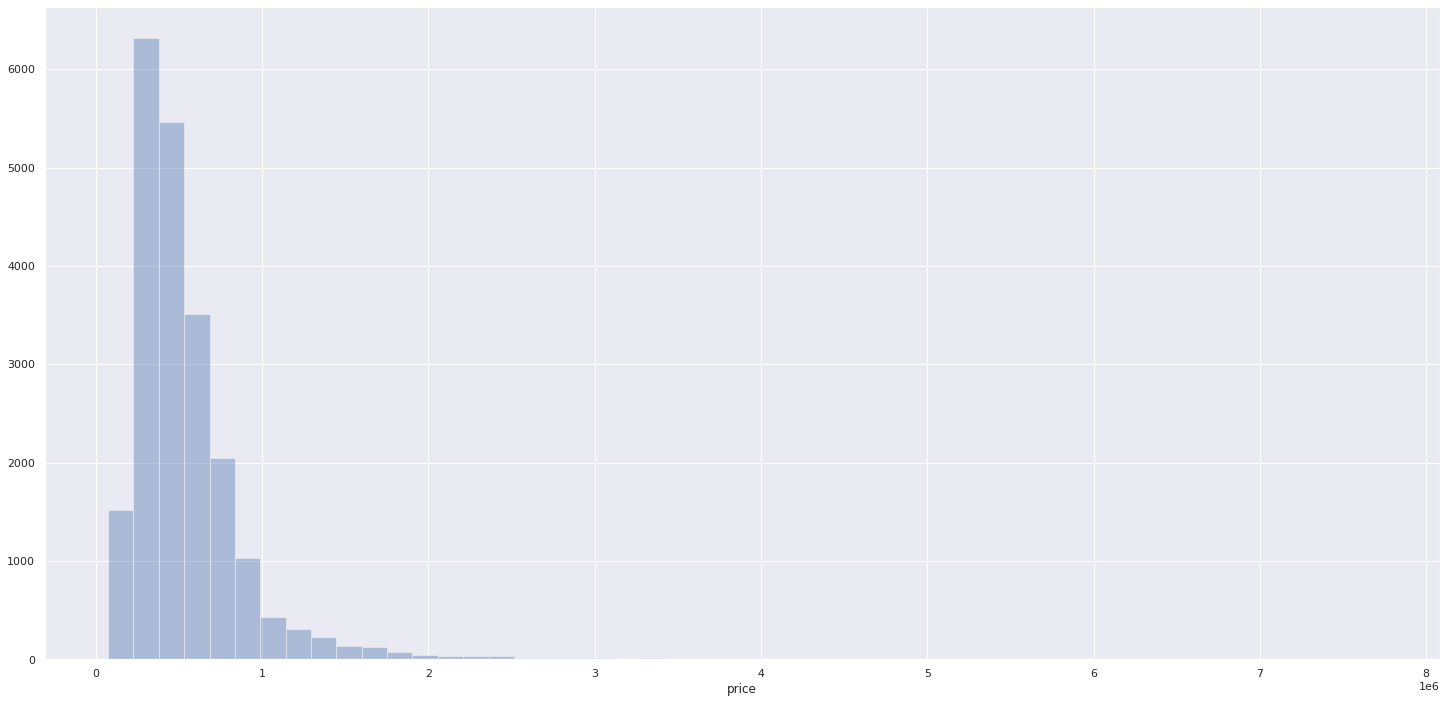

In [34]:
sns.distplot(df4['price'], kde = False)

### 4.1.2 Numerical Variable

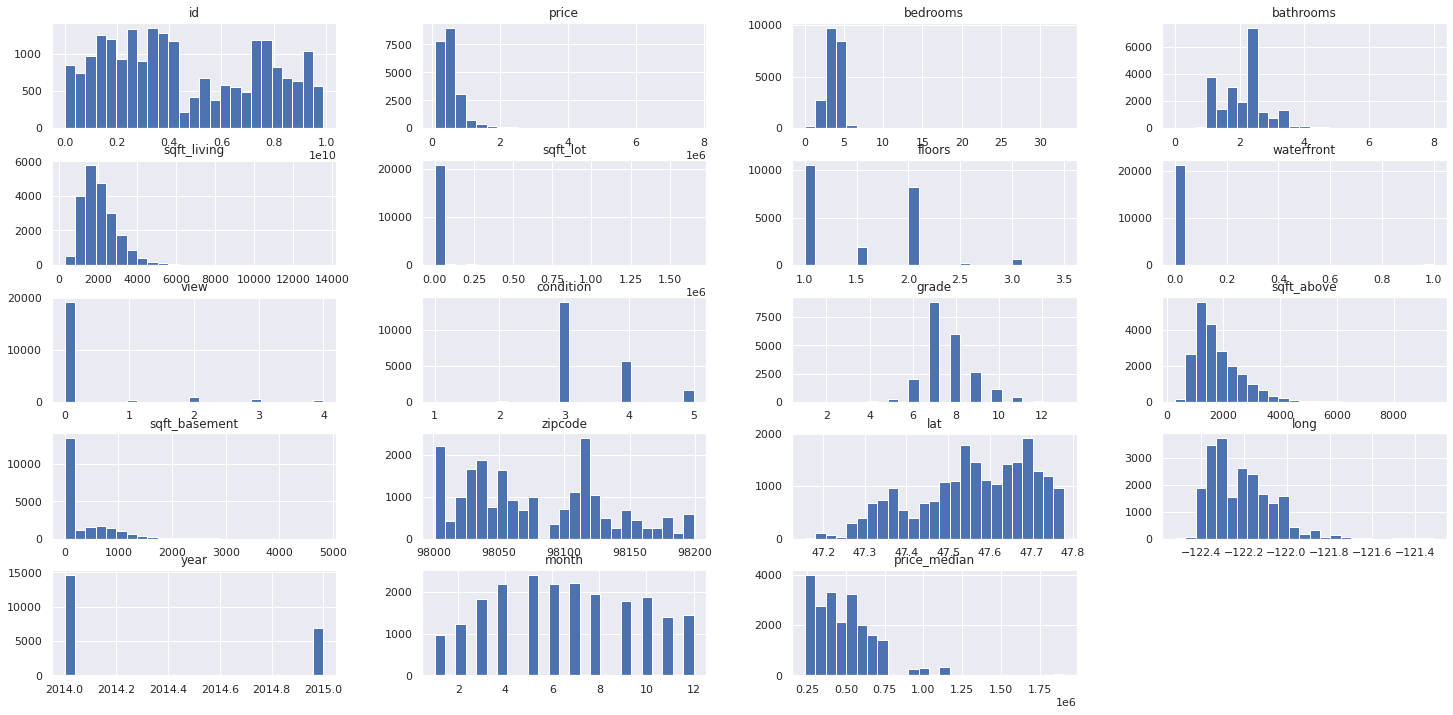

In [35]:
num_attributes.hist(bins=25);

## 4.2 Bivariate Analysis

### H1: Houses that have waterview, are 3 times more expansive, in mean, than houses without waterview.
### True

<BarContainer object of 2 artists>

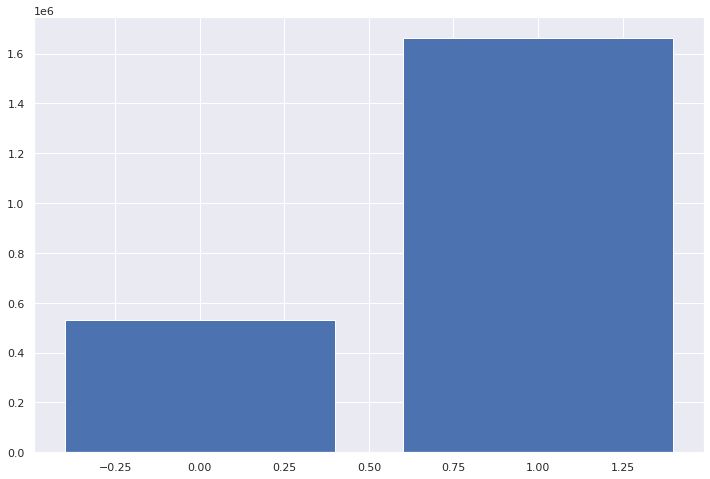

In [36]:
water_price = df4[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(water_price['waterfront'], water_price['price'])

### H2: Houses with built year below 1955, are 50% cheaper, in average.
### FALSE: the average price of houses built before or after 1955 are approximately the same.

<BarContainer object of 2 artists>

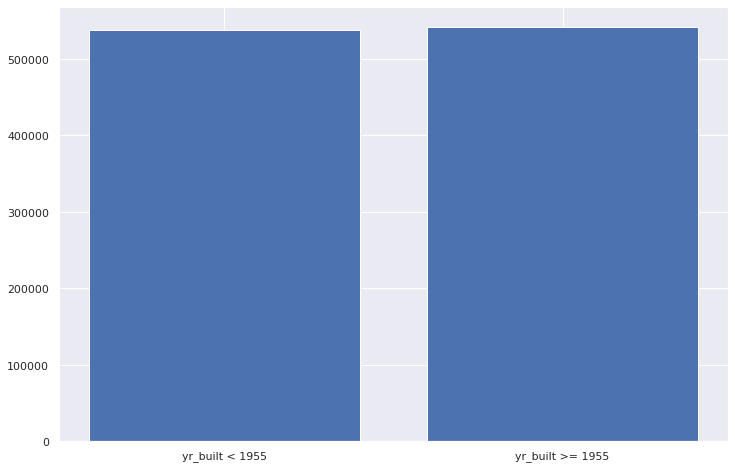

In [37]:
below_1955 = ['yr_built < 1955',  df4.loc[df4['yr_built']< pd.to_datetime('1955'), 'price'].mean()]
above_1955 = ['yr_built >= 1955', df4.loc[df4['yr_built']>=pd.to_datetime('1955'), 'price'].mean()]
                                      
plt.figure(figsize=(12, 8))
plt.bar([below_1955[0], above_1955[0]], [below_1955[1], above_1955[1]])

### H3: Houses with basement have sqft lot 50% larger than the houses without basement.
### FALSE: It is just about 20% larger

<BarContainer object of 2 artists>

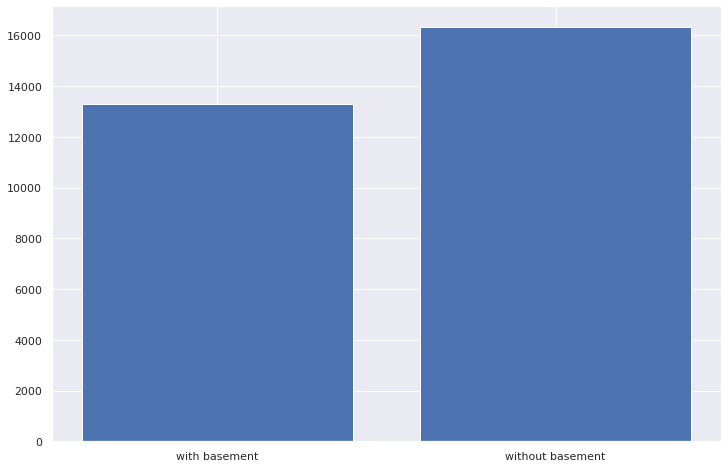

In [38]:
with_basement    = ['with basement'   , df4.loc[df4['sqft_basement']> 0, 'sqft_lot'].mean()]
without_basement = ['without basement', df4.loc[df4['sqft_basement']==0, 'sqft_lot'].mean()]

plt.figure(figsize=(12, 8))
plt.bar([with_basement[0], without_basement[0]], [with_basement[1], without_basement[1]])

### H4: The price evolution of houses YoY ( Year over Year ) is 10%.
### FALSE: the growth YoY is only about 1 %

In [39]:
avg_year = df4[['year', 'price']].groupby('year').mean().reset_index()
avg_year['diff(%)'] = ((avg_year['price'].diff(1))/avg_year['price'])*100
avg_year

,year,price,diff(%)
0,2014,539321.49,NaN
1,2015,543108.29,0.70


### H5: Houses with 3 bathrooms has an growth MoM ( Month over Month ) of 15%.
### FALSE: the growth MoM is about 0%

In [40]:
avg_month = df4.loc[df4['bathrooms'] == 3, ['date', 'month', 'price']].sort_values('date', ascending = True)
avg_month_14 = avg_month.loc[avg_month['date'].dt.year == 2014].groupby('month').mean().reset_index()
avg_month_15 = avg_month.loc[avg_month['date'].dt.year == 2015].groupby('month').mean().reset_index()
avg_mom = pd.concat([avg_month_14, avg_month_15], axis = 0)
avg_mom['diff(%)'] = (avg_mom['price'].diff(1))/avg_mom['price']*100
avg_mom['diff(%)'].mean()

-0.3038046338352459

### H6: Houses with 3 bedrooms has an growth MoM ( Month over Month ) of 20%.
### FALSE: the growth MoM of houses with three bedrooms is about 0%

In [41]:
avg_month_bed = df4.loc[df4['bedrooms'] == 3, ['date', 'month', 'price']].sort_values('date', ascending = True)
avg_month_bed_14 = avg_month_bed.loc[avg_month_bed['date'].dt.year == 2014].groupby('month').mean().reset_index()
avg_month_bed_15 = avg_month_bed.loc[avg_month_bed['date'].dt.year == 2015].groupby('month').mean().reset_index()
avg_mom_bed = pd.concat([avg_month_bed_14, avg_month_bed_15], axis = 0)
avg_mom_bed['diff(%)'] = (avg_mom_bed['price'].diff(1))/avg_mom_bed['price']*100
avg_mom_bed['diff(%)'].mean()

-0.046948629127680976

### H7: Houses built among decades of 40 and 70 are cheaper than all other houses built in other decades.
### TRUE

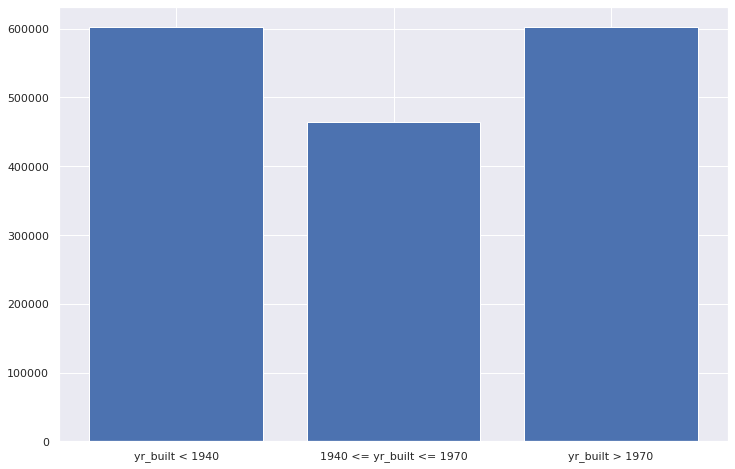

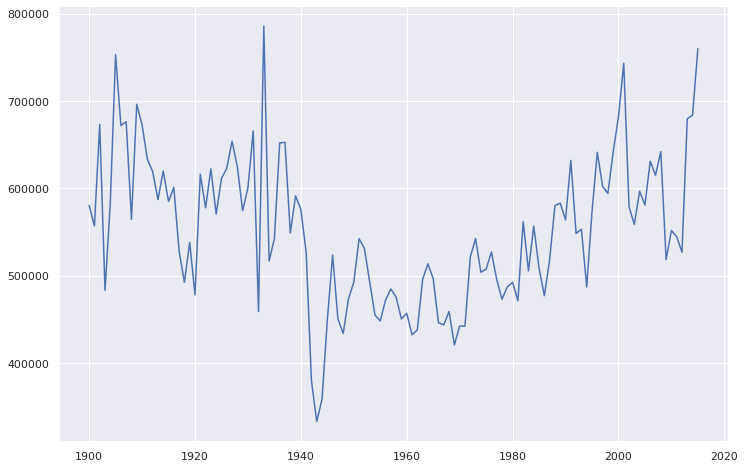

In [42]:
avg_40_70 = df4.loc[(df4['yr_built'] >=pd.to_datetime('1940')) & 
                     (df4['yr_built']<=pd.to_datetime('1970')), 
                     ['yr_built', 'price']].groupby('yr_built').mean().reset_index()

avg_40_70 = ['1940 <= yr_built <= 1970', avg_40_70['price'].mean()]

avg_40 = df4.loc[df4['yr_built']<pd.to_datetime('1940'), 
                     ['yr_built', 'price']].groupby('yr_built').mean().reset_index()

avg_40 = ['yr_built < 1940', avg_40['price'].mean()]
avg_70 = df4.loc[df4['yr_built']<pd.to_datetime('1940'), 
                     ['yr_built', 'price']].groupby('yr_built').mean().reset_index()

avg_70 = ['yr_built > 1970', avg_70['price'].mean()]

plt.figure(figsize = (12, 8))
plt.bar([avg_40[0], avg_40_70[0], avg_70[0]], [avg_40[1], avg_40_70[1], avg_70[1]])

by_year = df4[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize = (12, 8))
plt.plot(by_year['yr_built'], by_year['price'])

### H8: The prices increases accordingly to the newest year the house was renovated at 10% rate.
### FLASE: considering the year renovated, the average prices are decrising by about -8%.

-7.958717529877701

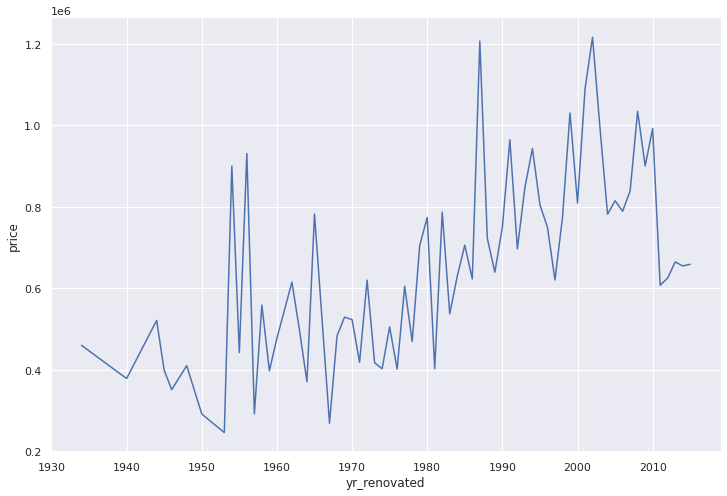

In [43]:
renovated = df4.loc[df4['yr_renovated']>pd.to_datetime('1930'), ['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()
renovated['diff(%)']=(renovated['price'].diff(1))/renovated['price']*100

plt.figure(figsize=(12, 8))
sns.lineplot(x='yr_renovated', y='price', data=renovated)

renovated['diff(%)'].mean()

### H9: Houses with two floors are 30% more expensive than those with one.
### TRUE

<BarContainer object of 2 artists>

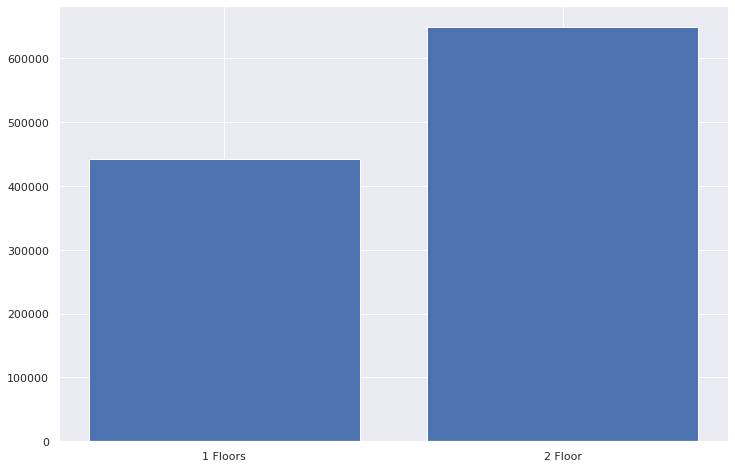

In [44]:
floor_2 = df4.loc[df4['floors'] == 2, 'price'].mean()
floor_2 = ['2 Floor', floor_2]

floor_1 = df4.loc[df4['floors'] == 1, 'price'].mean()
floor_1 = ['1 Floors', floor_1]

plt.figure(figsize = (12, 8))
plt.bar([floor_1[0], floor_2[0]], [floor_1[1], floor_2[1]])

### H10: Houses with at least two bathrooms are 10% more expensive than those with one.
### FALSE: Houses with at least two bathrooms are about 30% more expensive than those with one.

<BarContainer object of 2 artists>

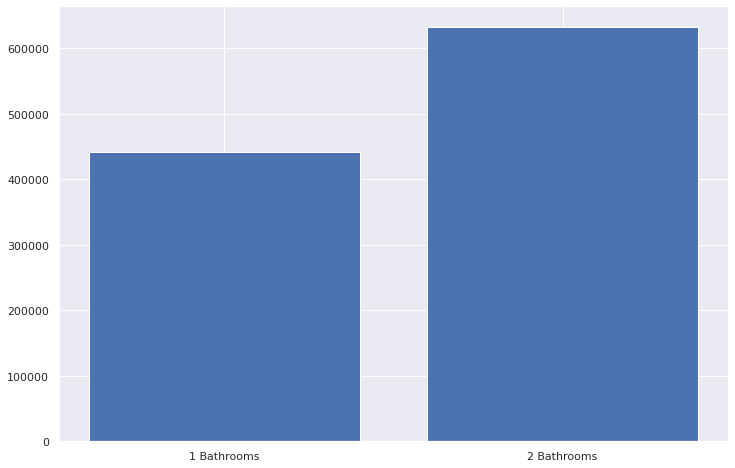

In [45]:
bath_2 = df4.loc[df4['bathrooms'] >= 2, 'price'].mean()
bath_2 = ['2 Bathrooms', bath_2]

bath_1 = df4.loc[df4['floors'] == 1, 'price'].mean()
bath_1 = ['1 Bathrooms', bath_1]

plt.figure(figsize = (12, 8))
plt.bar([bath_1[0], bath_2[0]], [bath_1[1], bath_2[1]])

### 4.2.2 Summary of Hypotheses

In [46]:
tab =[['Hyphotesis', 'Conclusion',  'Relevancy'],
      ['H1',         'True',        'High'],
      ['H2',         'False',       'Average'],
      ['H3',         'False',       'Low'],
      ['H4',         'False',       'High'],
      ['H5',         'False',       'High'],
      ['H6',         'False',       'Low'],
      ['H7',         'True',        'Average'],
      ['H8',         'False',       'Low'],
      ['H9',         'True',        'Low'],
      ['H10',        'False',       'Average']]

print(tabulate(tab, headers='firstrow'))

Hyphotesis    Conclusion    Relevancy
------------  ------------  -----------
H1            True          High
H2            False         Average
H3            False         Low
H4            False         High
H5            False         High
H6            False         Low
H7            True          Average
H8            False         Low
H9            True          Low
H10           False         Average


# 5. SELL/ PURCHASE RECOMENDATION

In [47]:
df5 = df4.copy()

In [48]:
df5['status'] = df5['condition'].apply(lambda x: 'Buy' if x>2 else 'Not Buy')

In [49]:
df5['season'] = df5['date'].apply(lambda x: 'Spring' 
                                    if ((x >= pd.to_datetime('2014-03-20')) & (x < pd.to_datetime('2014-06-21')))
                                    |  ((x >= pd.to_datetime('2015-03-20')) & (x < pd.to_datetime('2015-06-21')))
                                    else 'Summer'
                                    if (x >= pd.to_datetime('2014-06-21')) & (x < pd.to_datetime('2014-09-22'))
                                    else 'Fall'
                                    if (x >= pd.to_datetime('2014-09-22')) & (x < pd.to_datetime('2014-12-21'))
                                    else 'Winter')

In [50]:
df5['sell_price'] = df5[['price', 'price_median', 'status']].apply(lambda x: 
                                   x['price']*1.3 if (x['price'] <  x['price_median']) & (x['status'] == 'Buy')
                              else x['price']*1.1 if (x['price'] >= x['price_median']) & (x['status'] == 'Buy') 
                              else 0, axis = 1)

df5['profit'] = df5[['sell_price', 'price']].apply(lambda x: 
                                            (x['sell_price'] - x['price']) if x['sell_price'] != 0
                                       else 0, axis = 1)


#for i in range(len(df5)):
#    if (df5.loc[i, 'status']=='Buy'):
#        if(df5.loc[i, 'price'] < df5.loc[i, 'price_median']):
#            df5.loc[i, 'sell_price'] = df5.loc[i, 'price']*1.3
#        else:
#            df5.loc[i, 'sell_price'] = df5.loc[i, 'price']*1.1
#        df5.loc[i, 'profit']     = df5.loc[i, 'sell_price'] - df5.loc[i, 'price']
#    else:
#        df5.loc[i, 'sell_price'] = 0
#        df5.loc[i, 'profit']     = 0

In [51]:
purchase_sell_rec = df5.loc[df5['status'] == 'Buy'][['id', 'zipcode', 'price_median', 'price', 'sell_price', 'profit', 'season']]
purchase_sell_rec

,id,zipcode,price_median,price,sell_price,profit,season
0,7129300520,98178,279000.00,221900.00,288470.00,66570.00,Fall
1,4060000240,98178,279000.00,205425.00,267052.50,61627.50,Summer
2,4058801670,98178,279000.00,445000.00,489500.00,44500.00,Summer
3,2976800796,98178,279000.00,236000.00,306800.00,70800.00,Fall
4,6874200960,98178,279000.00,170000.00,221000.00,51000.00,Winter
...,...,...,...,...,...,...,...
21431,2525049086,98039,1905000.00,2720000.00,2992000.00,272000.00,Fall
21432,2525049113,98039,1905000.00,1950000.00,2145000.00,195000.00,Summer
21433,3262300485,98039,1905000.00,2250000.00,2475000.00,225000.00,Spring
21434,6447300365,98039,1905000.00,2900000.00,3190000.00,290000.00,Fall


In [52]:
purchase_sell_rec[['price', 'sell_price', 'profit']].sum()

price        11523953411.00
sell_price   13489025920.10
profit        1965072509.10
dtype: float64

In [308]:
#define interactive buttons
price_limit = widgets.IntSlider(
    value = int(df5['price'].mean()),
    min = int(df5['price'].min()),
    max = int(df5['price'].max()),
    step = 1,
    description = 'Maximum Price',
    disable = False,
    style = {'description_width': 'initial'})

living_limit = widgets.IntSlider(
    value = int(df5['sqft_living'].mean()),
    min = int(df5['sqft_living'].min()),
    max = int(df5['sqft_living'].max()),
    step = 1,
    description = 'Minimum Living Room Size',
    disable = False,
    style = {'description_width': 'initial'})

bathroom_limit = widgets.IntSlider(
    value = int(df5['bathrooms'].mean()),
    min = int(df5['bathrooms'].min()),
    max = int(df5['bathrooms'].max()),
    step = 1,
    description = 'Minimum Bathrooms Values',
    disable = False,
    style = {'description_width': 'initial'})

basement_limit = widgets.IntSlider(
    value = df5['sqft_basement'].mean(),
    min = df5['sqft_basement'].min(),
    max = df5['sqft_basement'].max(),
    step = 1,
    description = 'Maximum Basement Size',
    disable = False,
    style = {'description_width': 'initial'})

condition_limit = widgets.IntSlider(
    value = df5['condition'].mean(),
    min = df5['condition'].min(),
    max = df5['condition'].max(),
    step = 1,
    description = 'House Minimum Condition',
    disable = False,
    style = {'description_width': 'initial'})

yrbuilt_limit = widgets.IntSlider(
    value = df5['yr_built'].dt.year.mean(),
    min = df5['yr_built'].dt.year.min(),
    max = df5['yr_built'].dt.year.max(),
    step = 1,
    description = 'Built Since Year',
    disable = False,
    style = {'description_width': 'initial'})

waterfront_limit = widgets.Checkbox(
    value = False,
    description = 'Only waterfront',
    disable = False,
    indent = False)

def update_map(df, price_limit, living_limit, bathroom_limit, basement_limit, condition_limit, yrbuilt_limit, waterfront_limit): #passa como argumento o df5set e o critério de seleção
    #filter df5
    if(waterfront_limit):
        houses = df[(df['price'] < price_limit) &
                   (df['sqft_living'] > living_limit) &
                   (df['bathrooms'] >= bathroom_limit) &
                   (df['sqft_basement'] < basement_limit) &
                   (df['condition'] >= condition_limit) &
                   (df['yr_built'].dt.year >= yrbuilt_limit) &
                   (df['waterfront'] == waterfront_limit)][['id', 'lat', 'long', 'price', 'status']].copy()
    elif(waterfront_limit == False):
        houses = df[(df['price'] < price_limit) &
                   (df['sqft_living'] > living_limit) &
                   (df['bathrooms'] >= bathroom_limit) &
                   (df['sqft_basement'] < basement_limit) &
                   (df['condition'] >= condition_limit) &
                   (df['yr_built'].dt.year >= yrbuilt_limit)][['id', 'lat', 'long', 'price', 'status']].copy()
    
    #plot map
    fig = px.scatter_mapbox(houses,
                           lat = 'lat',
                           lon = 'long',
                           color = 'status',
                           size = 'price',
                           color_continuous_scale = px.colors.cyclical.IceFire,
                           size_max = 15,
                           zoom = 9)
    
    fig.update_layout(mapbox_style = 'open-street-map')
    fig.update_layout(height = 600, margin = {'r':0, 'l':0, 't':0 , 'b':0})
    fig.show()

In [309]:
widgets.interactive(update_map, df = fixed(df5), 
                    price_limit = price_limit,
                    living_limit = living_limit,
                    bathroom_limit = bathroom_limit,
                   basement_limit = basement_limit,
                   condition_limit = condition_limit,
                   yrbuilt_limit = yrbuilt_limit,
                   waterfront_limit = waterfront_limit) # fixed mantém o dado ao se alterar os valores do filtro

interactive(children=(IntSlider(value=540529, description='Maximum Price', max=7700000, min=75000, style=Slide…

# 6.0 DEPLOY

In [ ]:
import ipywidgets     as widgets
import seaborn        as sns
import plotly.express as px
import streamlit as st

import pandas         as pd
import numpy          as np

from matplotlib       import pyplot    as plt

from ipywidgets       import fixed,interact, interactive, fixed, interact_manual
from geopy.geocoders  import Nominatim
from tabulate         import tabulate
from matplotlib       import gridspec
from pathlib          import Path
from folium.plugins   import MarkerCluster
from streamlit_folium import folium_static
from datetime         import datetime

import geopandas
import folium

st.set_page_config(layout='wide')
f_data = st.sidebar.checkbox('Show Portfolio Page')

@st.cache(allow_output_mutation=True)
def get_data(path):
    data = pd.read_csv(path)

    return data

@st.cache(allow_output_mutation = True)
def get_geofile(url):
    geofile = geopandas.read_file(url)

    return geofile

def set_feature(data):
    data['price_m2'] = data['price']/data['sqft_lot']

    return data

if f_data:
    def overview_data(data):
        # ==============
        # Data Overview
        # ==============
        st.title('HOUSES CO')
        st.title('Data Overview')
        
        f_zipcode = st.sidebar.multiselect('Enter zipcode', data['zipcode'].unique())
        f_attributes = st.sidebar.multiselect('Enter columns', data.columns)

        # Filter overview table
        if   (f_zipcode != []) & (f_attributes != []):
            ov_data = data.loc[data['zipcode'].isin(f_zipcode), f_attributes]
        elif (f_zipcode != []) & (f_attributes == []):
            ov_data = data.loc[data['zipcode'].isin(f_zipcode), :]
        elif (f_zipcode == []) & (f_attributes != []):
            ov_data = data.loc[:, f_attributes]
        else:
            ov_data = data.copy()
        st.dataframe(ov_data)
        
        c1, c2 = st.columns((1, 1))
            # Average metrics
            
        if (f_zipcode != []):
            avg_data = data.loc[data['zipcode'].isin(f_zipcode), :]
        else:
            avg_data = data.copy()
            
        avg_data['price_m2'] = data['price_m2']
        df1 = avg_data[['id', 'zipcode']].groupby('zipcode').count().reset_index()
        df2 = avg_data[['price', 'zipcode']].groupby('zipcode').mean().reset_index()
        df3 = avg_data[['sqft_living', 'zipcode']].groupby('zipcode').mean().reset_index()
        df4 = avg_data[['price_m2', 'zipcode']].groupby('zipcode').count().reset_index()
            
        m1 = pd.merge(df1, df2, on='zipcode', how='inner')
        m2 = pd.merge(m1,  df3, on='zipcode', how='inner')
        df = pd.merge(m2,  df4, on='zipcode', how='inner')
        df.columns = ['zipcode', 'total_houses', 'price', 'sqft_living', 'price/m2']
        
        c1.header('Average Values')
        c1.dataframe(df, height=600)
        
            # Statistic Descriptive
        if (f_attributes != []):
            num_attributes = data[f_attributes].select_dtypes(include=['int64', 'float64'])
        else:
            num_attributes = data.select_dtypes(include=['int64', 'float64'])
            
        media   = pd.DataFrame(num_attributes.apply(np.mean))
        mediana = pd.DataFrame(num_attributes.apply(np.median))
        std     = pd.DataFrame(num_attributes.apply(np.std))
        max_    = pd.DataFrame(num_attributes.apply(np.max))
        min_    = pd.DataFrame(num_attributes.apply(np.min))
        df1     = pd.concat([max_, min_, media, mediana, std], axis=1).reset_index()
        df1.columns = ['attributes', 'max', 'min', 'mean', 'median', 'std']
        
        c2.header('Descriptive Analysis')
        c2.dataframe(df1, height=600)
        
        return None
    
    def portfolio_density(data, geofile):
        # =======================
        # Densidade de Portfólio
        # =======================
        st.title('Region Overview')
        
        c1, c2 = st.columns((1, 1))
        
        c1.header('Portfolio Density')
        
        df = data
        
        # Base Map - Folium
        density_map = folium.Map(location=[data['lat'].mean(), data['long'].mean()], default_zoom_start=15)
        marker_cluster = MarkerCluster().add_to(density_map)
        
        for name, row in df.iterrows():
            folium.Marker([row['lat'], row['long']], popup='Sold R${0} on: {1}. Features: {2} sqft, {3} bedrooms, {4} bathrooms, year built: {5}'
                      .format(row['price'],
                              row['date'],
                              row['sqft_living'],
                              row['bedrooms'],
                              row['bathrooms'],
                              row['yr_built'])).add_to(marker_cluster)
        with c1:
            folium_static(density_map)
            
        # Region Price Map
        c2.header('Price Density')
        df = data[['price', 'zipcode']].groupby('zipcode').mean().reset_index()
        df.columns = ['ZIP', 'PRICE']

        geofile = geofile[geofile['ZIP'].isin(df['ZIP'].tolist())]
        region_price_map = folium.Map(location=[data['lat'].mean(),
                                            data['long'].mean()],
                                  default_zoom_start=15)
        region_price_map.choropleth(data=df,
                                geo_data=geofile,
                                columns=['ZIP', 'PRICE'],
                                key_on='feature.properties.ZIP',
                                fill_color='YlOrRd',
                                fill_opacity=0.7,
                                line_opacity=0.2,
                                legend_name='AVG PRICE')
        with c2:
            folium_static(region_price_map)
            
        return None
    
    def commercial_distribution(data):
        # ==================================================
        # Distribuição dos imóveis por categorias comerciais
        # ==================================================
        st.sidebar.title('Coomercial Options')
        
        st.title('Commercial Attributes')
        
        # Average Price per Year
        data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

        min_year_built = int(data['yr_built'].min())
        max_year_built = int(data['yr_built'].max())
        st.sidebar.subheader('Select Max Year Built')
        f_year_built = st.sidebar.slider('Year Built', min_year_built,
                                     max_year_built,
                                     max_year_built)
        st.header('Average Price per Year Built')
        
        df = data.loc[data['yr_built'] < f_year_built]
        df = df[['yr_built', 'price']].groupby('yr_built').mean().reset_index()

        fig = px.line(df, x='yr_built', y='price')
        st.plotly_chart(fig, use_container_width=True)
        
        # Average Price per Day
        st.header('Average Price per Day')
        st.sidebar.subheader('Select Max Date')

        min_date = datetime.strptime(data['date'].min(), '%Y-%m-%d')
        max_date = datetime.strptime(data['date'].max(), '%Y-%m-%d')

        f_date = st.sidebar.slider('Date', min_date, max_date, max_date)
    
        data['date'] = pd.to_datetime(data['date'])
        df = data.loc[data['date'] < f_date]
        df = df[['date', 'price']].groupby('date').mean().reset_index()

        fig = px.line(df, x='date', y='price')
        st.plotly_chart(fig, use_container_width=True)
        
        # Histograma
        st.header('Price Distribution')
        st.sidebar.subheader('Select Max Price')

        min_price = int(data['price'].min())
        max_price = int(data['price'].max())
        avg_price = int(data['price'].mean())
        f_price = st.sidebar.slider('Price', min_price, max_price, max_price)
        df = data.loc[data['price'] < f_price]

        fig = px.histogram(df, x='price', nbins=50)
        st.plotly_chart(fig, use_container_width=True)
        
        return None
    
    def attributes_distribution(data):
        # ===============================================
        # Distribuição dos imoveis por categorias físicas
        # ===============================================
        st.sidebar.title('Attributes Options')
        
        st.title('House Attributes')

        f_bedrooms  = st.sidebar.selectbox('Max number of bedrooms',  sorted(set(data['bedrooms'].unique())))
        f_bathrooms = st.sidebar.selectbox('Max number of bathrooms', sorted(set(data['bathrooms'].unique())))
        
        c1, c2 = st.columns(2)
        
        # House per bedroms
        c1.header('Houses per bedrooms')
        df = data[data['bedrooms'] < f_bedrooms]
        fig = px.histogram(df, x='bedrooms', nbins=19)
        c1.plotly_chart(fig, use_container_width=True)
        
        # House per bathrooms
        c2.header('Houses per bathrooms')
        df = data[data['bathrooms'] < f_bathrooms]
        fig = px.histogram(df, x='bathrooms', nbins=19)
        c2.plotly_chart(fig, use_container_width=True)
        
        # filters
        f_floors = st.sidebar.selectbox('Max number of floor', sorted(set(data['floors'].unique())))
        f_waterview = st.sidebar.checkbox('Water View')
        
        c1, c2 = st.columns(2)
        
        # House per floors
        c1.header('House per floors')
        df = data[data['floors'] < f_floors]
        fig = px.histogram(df, x='floors', nbins=19)
        c1.plotly_chart(fig, use_container_width=True)
        
        # House per water view
        c2.header('Water View')
        if f_waterview:
            df = data[data['waterfront'] == 1]
        else:
            df = data.copy()
            
        fig = px.histogram(df, x='waterfront', nbins=10)
        
        c2.plotly_chart(fig, use_container_width=True)
        
        return None
            
######################################################################################################		
######################################################################################################		
######################################################################################################

else:
    
    def sell_attributes(data):
        
        st.title('HOUSES CO')
        st.title('Purchase/ Sell Table')
        
        st.sidebar.title('Table Filter')
        
        f_zipcode = st.sidebar.multiselect('Enter zipcode', data['zipcode'].unique())
        
        if (f_zipcode != []):
            data = data.loc[data['zipcode'].isin(f_zipcode)]
        else:
            data = data.copy()
               
        df = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()
        
        df.columns = ['zipcode', 'price_median']

        data = pd.merge(data, df, on = 'zipcode', how = 'inner')
        
        data['status'] = data['condition'].apply(lambda x: 'Buy' if x>2 else 'Not Buy')
        
        data['date'] = pd.to_datetime(data['date'])
        
        data['season'] = data['date'].apply(lambda x: 'Spring' 
                                    if ((x >= pd.to_datetime('2014-03-20')) & (x < pd.to_datetime('2014-06-21')))
                                    |  ((x >= pd.to_datetime('2015-03-20')) & (x < pd.to_datetime('2015-06-21')))
                                    else 'Summer'
                                    if (x >= pd.to_datetime('2014-06-21')) & (x < pd.to_datetime('2014-09-22'))
                                    else 'Fall'
                                    if (x >= pd.to_datetime('2014-09-22')) & (x < pd.to_datetime('2014-12-21'))
                                    else 'Winter')   
        
        data['sell_price'] = data[['price', 'price_median', 'status']].apply(lambda x: 
                                   x['price']*1.3 if (x['price'] <  x['price_median']) & (x['status'] == 'Buy')
                              else x['price']*1.1 if (x['price'] >= x['price_median']) & (x['status'] == 'Buy') 
                              else 0, axis = 1)

        data['profit'] = data[['sell_price', 'price']].apply(lambda x: 
                                            (x['sell_price'] - x['price']) if x['sell_price'] != 0
                                       else 0, axis = 1)
        
        purchase_sell_rec = data.loc[data['status'] == 'Buy'][['id', 'zipcode', 'price_median', 'price', 'sell_price', 'profit', 'season']]
        
        st.dataframe(purchase_sell_rec)
        
        return None

    def update_map(data): 
        #filter data
        st.title('Map Recomendations')
        
        st.sidebar.title('Map Filter')
        
        min_price = int(data['price'].min())
        max_price = int(data['price'].max())
        avg_price = int(data['price'].mean())
        price_limit = st.sidebar.slider('Price', min_price, max_price, max_price)
        
        value = int(data['sqft_living'].mean())
        min_ = int(data['sqft_living'].min())
        max_ = int(data['sqft_living'].max())
        living_limit = st.sidebar.slider('Minimum Living Room Size', min_, max_, min_)
    
        value = int(data['bathrooms'].mean())
        min_ = int(data['bathrooms'].min())
        max_ = int(data['bathrooms'].max())
        bathroom_limit = st.sidebar.slider('Minimum Bathrooms Values', min_, max_, min_)
       
        value = int(data['yr_built'].mean())
        min_ =  int(data['yr_built'].min())
        max_ =  int(data['yr_built'].max())
        yrbuilt_limit  = st.sidebar.slider('Built Since Year', min_, max_, min_)#value)
       
        waterfront_limit = st.sidebar.checkbox('Only waterfront', value=False, disabled=False)

        data['status'] = data['condition'].apply(lambda x: 'Buy' if x>2 else 'Not Buy')
        
        if(waterfront_limit):
            houses = data[(data['price'] < price_limit) &
                       (data['sqft_living'] > living_limit) &
                       (data['bathrooms'] >= bathroom_limit) &
                       (data['yr_built'] >= yrbuilt_limit) &
                       (data['waterfront'] == waterfront_limit)][['id', 'lat', 'long', 'price', 'status']].copy()
        elif(waterfront_limit == False):
            houses = data[(data['price'] < price_limit) &
                       (data['sqft_living'] > living_limit) &
                       (data['bathrooms'] >= bathroom_limit) &
                       (data['yr_built'] >= yrbuilt_limit)][['id', 'lat', 'long', 'price', 'status']].copy()
        
        #plot map
        fig = px.scatter_mapbox(houses,
                               lat = 'lat',
                               lon = 'long',
                               color = 'status',
                               size = 'price',
                               color_continuous_scale = px.colors.cyclical.IceFire,
                               size_max = 15,
                               zoom = 9)
        
        fig.update_layout(mapbox_style = 'open-street-map')
        fig.update_layout(height = 600, margin = {'r':0, 'l':0, 't':0 , 'b':0})
        st.plotly_chart(fig)


if __name__ == "__main__":
    
    path = 'data/raw/kc_house_data.csv'
        
    data = get_data(path)
        
    if f_data:
        
        url = 'https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'
        
        geofile = get_geofile( url )
        
        data = set_feature(data)
        
        overview_data(data)
        
        portfolio_density(data, geofile)
    
        commercial_distribution(data)
    
        attributes_distribution(data)
        
    else:
        
        sell_attributes(data)
        
        update_map(data)